In [8]:
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [9]:
on2onlabel = dict()
for idx, name in enumerate(os.listdir('/Users/julianalverio/code/objectnet-oct-24-d123')):
    on2onlabel[name] = idx
onlabel2name = {v: k for k, v in on2onlabel.items()}

In [10]:
# file_path = '/Users/julianalverio/code/resnet/runs/1_examples_113_classes_50_epochs'
file_paths = os.listdir('/Users/julianalverio/code/resnet/runs/')
# file_paths.remove('1_examples_113_classes_50_epochs')

In [11]:
def get_totals(record_dict):
    scores = np.array([0, 0]).astype(np.float64)
    for value in record_dict.values():
        scores += value
    return scores

def process_file(path):
    split_info = path.split('/')[-1].split('_')
    num_examples = int(split_info[0])
    num_epochs = int(split_info[4])
    num_classes = int(split_info[2])
    if num_classes == 113:
        dataset = 'IM overlap ON'
    else:
        dataset = 'Full ON'
    prefix = '/Users/julianalverio/code/resnet/runs/'
    with open(prefix + path, 'rb') as f:
        data = pickle.load(f)
    
    totals = np.array([get_totals(record_dict) for record_dict in data])
    scores = totals / (num_examples * num_classes)
    plot(scores, dataset, num_examples)
    
def plot(scores, dataset, num_examples):
    print(data)
    data = pd.DataFrame(scores)
    data.columns = ['top1 score', 'top5 score']
    ax = data.plot(title='%s examples, dataset: %s' % (num_examples, dataset))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Score")
    plt.show()
    

In [12]:
[process_file(file_path) for file_path in file_paths]

AttributeError: 'list' object has no attribute 'values'

In [7]:
with open('/Users/julianalverio/code/resnet/runs/8_examples_113_classes_45_epochs', 'rb') as f:
    data = pickle.load(f)

In [63]:
# data for n=8 with overlap
with open('/Users/julianalverio/Desktop/8_overlap.txt') as f:
    input_text = f.read()

In [51]:
training_top1 = []
training_top5 = []
evaluation_top1 = []
evaluation_top5 = []

for line in input_text.split('\n'):
    if "training top1 score" in line:
        value = eval(line.split(':')[-1][1:])
        training_top1.append(value)
    if "training top5 score" in line:
        value = eval(line.split(':')[-1][1:])
        training_top5.append(value)
    if line.startswith("top5 score:"):
        value = eval(line.replace("top5 score: ", ""))
        evaluation_top5.append(value)
    if line.startswith("top1 score:"):
        value = eval(line.replace("top1 score: ", ""))
        evaluation_top1.append(value)

In [54]:
training_top1 = pd.DataFrame(np.array(training_top1))
training_top5 = pd.DataFrame(np.array(training_top5))
evaluation_top1 = pd.DataFrame(np.array(evaluation_top1))
evaluation_top5 = pd.DataFrame(np.array(evaluation_top5))

In [59]:
data = pd.concat([training_top1, training_top5, evaluation_top1, evaluation_top5], axis=1)
data.columns = ['training_top1', 'training_top5', 'evaluation_top1', 'evaluation_top5']

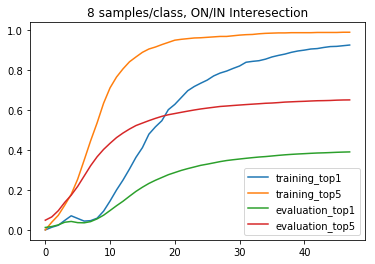

In [62]:
data.plot(title='8 samples/class, ON/IN Interesection')

In [70]:
# data for n=16 with overlap
with open('/Users/julianalverio/Desktop/16_overlap.txt') as f:
    input_text = f.read()

In [71]:
training_top1 = []
training_top5 = []
evaluation_top1 = []
evaluation_top5 = []

for line in input_text.split('\n'):
    if "training top1 score" in line:
        value = eval(line.split(':')[-1][1:])
        training_top1.append(value)
    if "training top5 score" in line:
        value = eval(line.split(':')[-1][1:])
        training_top5.append(value)
    if line.startswith("top5 score:"):
        value = eval(line.replace("top5 score: ", ""))
        evaluation_top5.append(value)
    if line.startswith("top1 score:"):
        value = eval(line.replace("top1 score: ", ""))
        evaluation_top1.append(value)

In [72]:
training_top1 = pd.DataFrame(np.array(training_top1))
training_top5 = pd.DataFrame(np.array(training_top5))
evaluation_top1 = pd.DataFrame(np.array(evaluation_top1))
evaluation_top5 = pd.DataFrame(np.array(evaluation_top5))

In [73]:
data = pd.concat([training_top1, training_top5, evaluation_top1, evaluation_top5], axis=1)
data.columns = ['training_top1', 'training_top5', 'evaluation_top1', 'evaluation_top5']

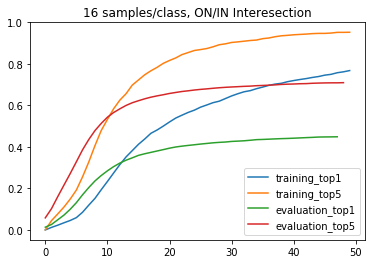

In [75]:
data.plot(title='16 samples/class, ON/IN Interesection')